# [Python3 & OpenCV で画像処理を学ぶ[2] 〜 情報可視化のためのヒストグラム基礎実験](https://optie.hatenablog.com/entry/2018/02/26/183825)

In [1]:
import numpy as np
import scipy.stats as sstats
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2

%matplotlib inline

In [7]:
!curl --output kimetsu.jpg https://images-na.ssl-images-amazon.com/images/I/811YHDsIdSL._SX600_.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80149  100 80149    0     0   889k      0 --:--:-- --:--:-- --:--:--  889k


In [8]:
def grayhist(img, stats=False):
    """
    入力 : BGR画像, 統計量の表示の有無(Optional)
    出力 : グレースケールのimshow, Histgram(+統計量)
    """
    # スタイルの設定。seabornの設定は残るため、常に最初に書いておく
    sns.set()
    sns.set_style(style='ticks')

    # プロット全体と個々のグラフのインスタンス
    fig = plt.figure(figsize=[15,4])
    ax1 = fig.add_subplot(1,2,1)
    
    sns.set_style(style='whitegrid')
    ax2 = fig.add_subplot(1,2,2)
    
    # グレースケール画像化→三重配列に戻す
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    ax1.imshow(img)
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 一次元配列化
    img = np.array(img).flatten()
    # 本来rangeは[0,255]となるはずだが、255に値が集まりすぎたので弾いた
    img = img[img!=255]

    # 軸の刻み目
    ax2.set_xticks(np.linspace(0,255,9).astype(int))
    
    # ヒストグラムを計算→色をつける
    N, bins, patches = ax2.hist(img, range=(0,255), bins=256)
    for (i,patch) in enumerate(patches):
        color = cm.gray(bins[i]/256)
        patch.set_facecolor(color)

    if stats==True: # 統計量を表示する
        mean = img.mean()
        std = np.std(img)
        median = np.median(img)
        mode = sstats.mode(img)[0][0]

        # 統計量のラインをひく
        ax2.axvline(mean, color='#d95763', linestyle='solid', linewidth=3)
        ax2.axvline(median, color='#6abe30', linestyle='solid', linewidth=2)
        ax2.axvline(mode, color='#ba9641', linestyle='solid', linewidth=2)
        ax2.axvline(mean + std, color='#d95763', linestyle='dashdot', linewidth=1)
        ax2.axvline(mean - std, color='#d95763', linestyle='dashdot', linewidth=1)

        # 統計量の説明の文字
        ax2.text(mean,N.max()*1.075, "$\mu$",color='#d95763',horizontalalignment='center')
        ax2.text(median,N.max()*1.18,"median", color='#6abe30',rotation=45)
        ax2.text(mode,N.max()*1.15,"mode",color='#ba9641',rotation=45)
        ax2.text(mean+std,N.max()*1.075, "$\mu+\sigma$", color='#d95763',horizontalalignment='center')
        ax2.text(mean-std,N.max()*1.075, "$\mu-\sigma$", color='#d95763',horizontalalignment='center')

        fig.tight_layout()
        plt.show()
        
        print("mean    : ", mean)
        print("stddev  : ", std)
        print("median  : ", median)
        print("mode    : ", mode)
        
    else:
        fig.tight_layout()
        plt.show()


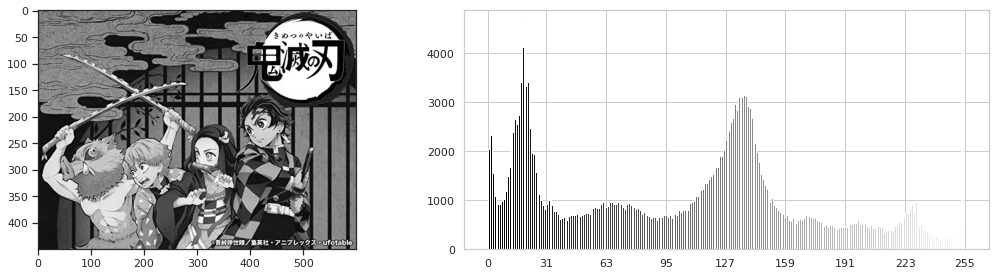

In [16]:
from numpy.lib.type_check import imag
# 2nd arg: 1=BGR
img = cv2.imread('kimetsu.jpg',1)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

grayhist(rgb)

In [13]:
def rgb_hist(rgb_img):
    sns.set()
    sns.set_style(style='ticks')
    fig = plt.figure(figsize=[15,4])
    ax1 = fig.add_subplot(1,2,1)
    sns.set_style(style='whitegrid')
    ax2 = fig.add_subplot(1,2,2)
    
    ax1.imshow(rgb_img)

    color=['r','g','b']

    for (i,col) in enumerate(color): # 各チャンネルのhist
        # cv2.calcHist([img], [channel], mask_img, [binsize], ranges)
        hist = cv2.calcHist([rgb_img], [i], None, [256], [0,256])
        # グラフの形が偏りすぎるので √ をとってみる
        hist = np.sqrt(hist)
        ax2.plot(hist,color=col)
        ax2.set_xlim([0,256])

    plt.show()


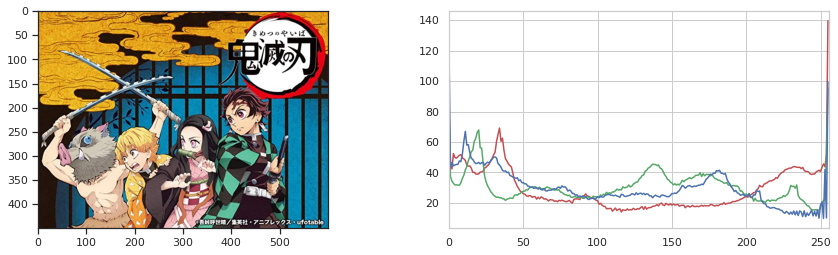

In [17]:
rgb_hist(rgb)


In [18]:
def axes4():  
    """
    四分割したプロットを描画するときのための関数。
    axesが4つ入ったリストを返す
    """
    sns.set()
    fig = plt.figure(figsize=[15,15])
    sns.set_style(style='ticks')
    ax1 = fig.add_subplot(2,2,1)

    sns.set_style(style='whitegrid')
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    axes = [ax1,ax2,ax3,ax4]
    return axes


def tri_hists(rgb_img, color='rgb'):
    """
    'rgb','hsv','lab'の指定を受け取って、
    「入力画像」と「各チャンネルのヒストグラム」の計4枚のプロットを描画する
    """
    axes = axes4()
    
    axes[0].set_title('image')
    axes[0].imshow(rgb_img)
    
    if color=='rgb':
        img_ch = img
        color=['R','G','B']
    elif color=='hsv':    
        img_ch = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
        color=['Hue','Saturation','Brightness']
    elif color=='lab':
        img_ch = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2Lab)
        color=['L*','a*','b*']
    else:
        return

    for (i,col) in enumerate(color): # 各チャンネルのhist
        if col=='Hue':  # Hueの値域は[0,180)
            hist = cv2.calcHist([img_ch], [i], None, [180], [0,180]) 
        else:
            hist = cv2.calcHist([img_ch], [i], None, [256], [0,256])
        hist = np.sqrt(hist)
        axes[i+1].set_title(col)
        axes[i+1].plot(hist)

    plt.show()


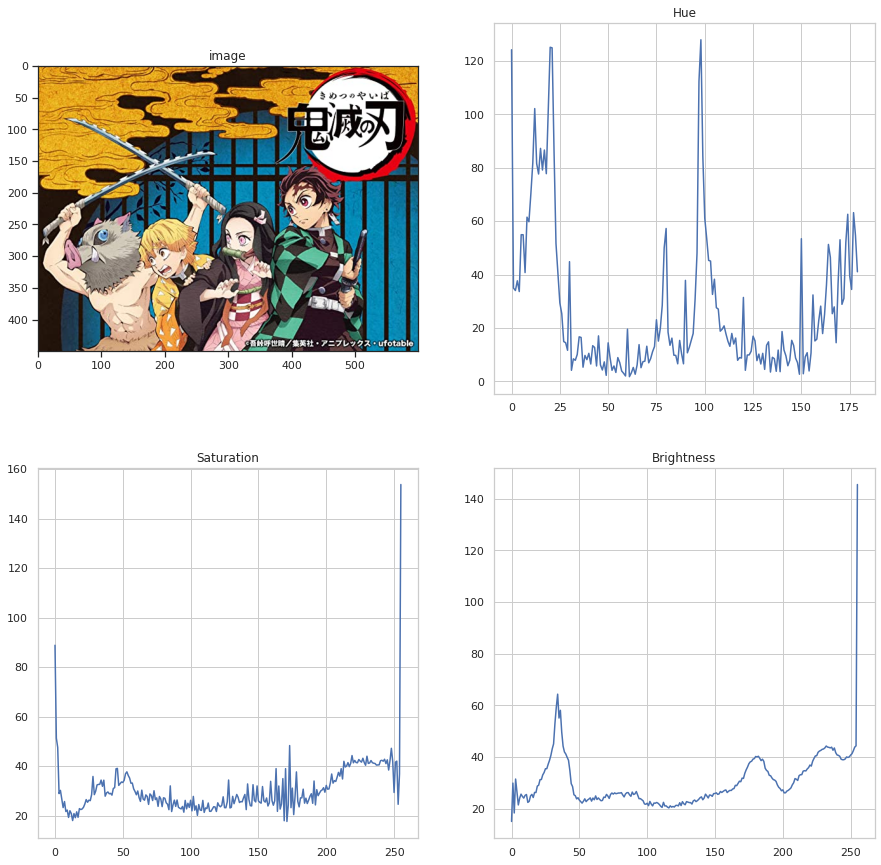

In [20]:
tri_hists(rgb, 'hsv')


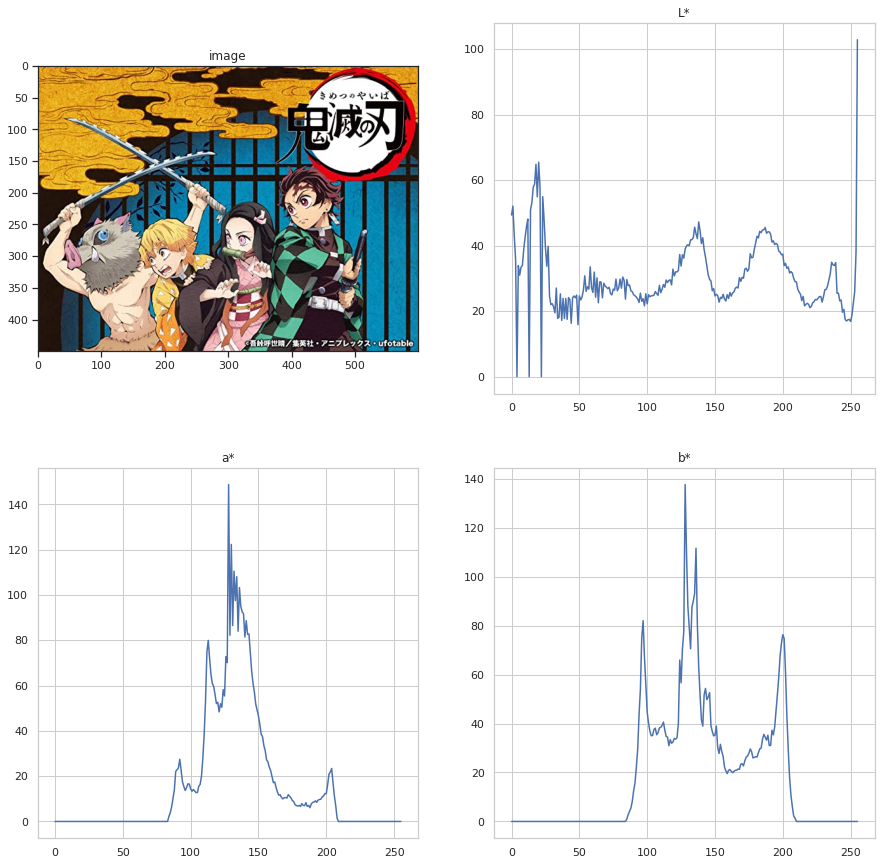

In [21]:
tri_hists(rgb, 'lab')


In [22]:
def hs_hist(rgb_img):
    """
    [目的]
    「横軸に 色相 , 縦軸に 彩度 をとり、
    点(H,S)における頻度を 明度 で表現するグラフ」を作りたい。
    
    [実装]
    入力のRGB画像をHSVに変換し、(H, S)の二次元ヒストグラムを計算して(H, S, 頻度)の配列を作る。
    その配列をHSV2RGBとして変換し、RGB画像としてimshowに表示させる関数。
    """
    sns.set()
    sns.set_style(style='ticks')
    
    img_hsv= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

    # (H,S) だけにして、H,Sも分離
    hs_2d = img_hsv[:,:,0:2].reshape(-1,2)
    h = hs_2d[:,0]
    s = hs_2d[:,1]

    # ヒストグラムのbinの設定。OpenCVにおいてHの値域は0~180である（0-255に納めるためか）
    hedges = np.arange(0,180)
    sedges = np.arange(0,255)

    # 二次元ヒストグラム
    H, xedges, yedges = np.histogram2d(h,s, bins=(hedges, sedges))
    H = H.T

    # log scaleで偏りを緩和 & 正規化
    H_log = np.log(H+1)
    H_norm = H_log/H_log.max()*255

    # (H,S,頻度)の配列にするために、まずH[S]を縦[横]にリピートし、x行y列の配列にする
    x = H_norm.shape[1]
    y = H_norm.shape[0]
    hue_xy = np.repeat(xedges[:-1],y).reshape(x,y).T
    sat_xy = np.repeat(yedges[:-1],x).reshape(y,x)

    # depth方向にくっつけて、(H,S,頻度)の配列にする。uint8型でないとcvtColorが受けつけないらしい
    HS_hist = np.dstack((hue_xy, sat_xy, H_norm)).astype('uint8')
    HS_hist_im = cv2.cvtColor(HS_hist, cv2.COLOR_HSV2RGB)
    HS_hist_im = cv2.resize(HS_hist_im,(360,100))

    # 以下、元の画像をax1に、ヒストグラムをax2に表示する
    fig = plt.figure(figsize=[15,4])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.imshow(rgb_img)
    ax1.set_title('image')

    ax2.set_title('Hue-Saturation Histgram')
    ax2.set_xlabel('Hue')
    ax2.set_ylabel('Saturation')
    ax2.set_xticks(np.linspace(0,360,13))
    ax2.set_xlim(0,360)
    ax2.set_ylim(0,100)
    ax2.imshow(HS_hist_im,origin='low',interpolation='bicubic')

    plt.show() 


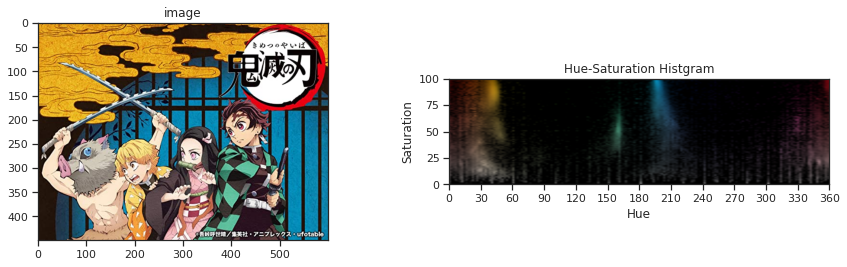

In [23]:
hs_hist(rgb)


In [24]:
def ab_hist(rgb_img):
    """
    基本的にhs_histと同じ
    """
    sns.set()
    sns.set_style(style='ticks')
    
    img_lab = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2Lab)

    # (a,b) だけにして、a,bも分離
    ab_2d = img_lab[:,:,1:3].reshape(-1,2)
    a = ab_2d[:,0]
    b = ab_2d[:,1]

    aedges = np.arange(0,255)
    bedges = np.arange(0,255)

    H, xedges, yedges = np.histogram2d(a,b, bins=(aedges, bedges))
    H = H.T

    H_log = np.log(H+1)
    H_norm = H_log/H_log.max()*255

    # (頻度,a,b)の配列とするために、まずa[b]を縦[横]にリピートし、x行y列の配列にする。
    x = H_norm.shape[1]
    y = H_norm.shape[0]
    a_xy = np.repeat(xedges[:-1],y).reshape(x,y).T
    b_xy = np.repeat(yedges[:-1],x).reshape(y,x)

    # depth方向にくっつけて、(頻度,a,b)の配列にする。
    ab_hist = np.dstack((H_norm, a_xy, b_xy)).astype('uint8')
    ab_hist_im = cv2.cvtColor(ab_hist, cv2.COLOR_Lab2RGB)
    ab_hist_im = cv2.resize(ab_hist_im,(255,255))
    
    fig = plt.figure(figsize=[15,4])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.imshow(rgb_img)
    ax1.set_title('image')

    ax2.set_title('a*b* Histgram')
    ax2.set_xlabel('G ← a* → R')
    ax2.set_ylabel('B ← b* → Y')
    ax2.axvline(255/2, color='white', linestyle='solid', linewidth=1)
    ax2.axhline(255/2, color='white', linestyle='solid', linewidth=1)
    ax2.imshow(ab_hist_im,origin='low',interpolation='bicubic')

    plt.show()


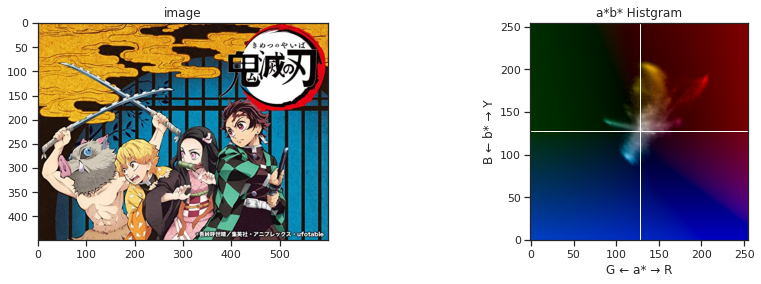

In [25]:
ab_hist(rgb)
